R² Score: 0.9387098237077887
Mean Squared Error: 753796.7693734544
            Coefficient
age         -101.059234
experience  2154.805493
Intercept: 31465.056418503933


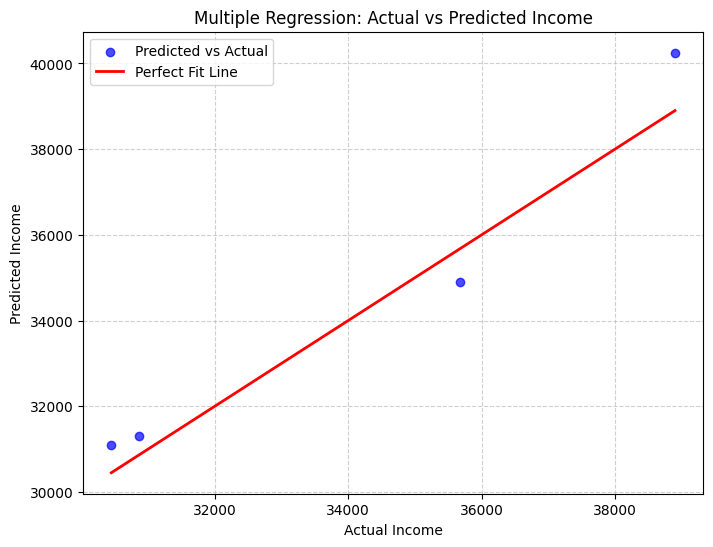

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("multiple_linear_regression_dataset.csv")

# Clean column names
df.columns = df.columns.str.strip()

# Define features (X) and target (y)
X = df[['age', 'experience']]
y = df['income']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate model
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

# Show coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

# Intercept
print("Intercept:", model.intercept_)

# ---- Plot Actual vs Predicted ----
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color="blue", alpha=0.7, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linewidth=2, label="Perfect Fit Line")
plt.xlabel("Actual Income")
plt.ylabel("Predicted Income")
plt.title("Multiple Regression: Actual vs Predicted Income")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()
